In [61]:
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [2]:
df1 = pd.read_csv("IDA_data1.csv")
df2 = pd.read_csv("IDA_data2.csv")
df3 = pd.read_csv("IDA_data3.csv")
df1.head()

/home/vu/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/vu/miniconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Repaid 3rd Party,Due 3rd Party,Credits Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,4/30/2020 0:00,IDA07770,LATIN AMERICA AND CARIBBEAN,HN,Honduras,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P007353,...,0.0,0,0.0,9/1/1988 0:00,3/1/2028 0:00,4/6/1978 0:00,3/14/1978 0:00,8/15/1978 0:00,12/31/1984 0:00,NaN
1,4/30/2020 0:00,IDA07780,SOUTH ASIA,AF,Afghanistan,STATE PLANNING COMM.,Fully Repaid,0.75,USD,P009314,...,0.0,0,0.0,6/15/1988 0:00,12/15/2027 0:00,4/10/1978 0:00,3/21/1978 0:00,9/19/1978 0:00,6/30/1983 0:00,NaN
2,4/30/2020 0:00,IDA07790,SOUTH ASIA,AF,Afghanistan,MINISTRY OF COMMERCE,Fully Repaid,0.75,USD,P009315,...,0.0,0,0.0,6/15/1988 0:00,12/15/2027 0:00,9/27/1978 0:00,3/21/1978 0:00,5/15/1979 0:00,6/30/1985 0:00,NaN
3,4/30/2020 0:00,IDA07800,MIDDLE EAST AND NORTH AFRICA,JO,Jordan,MINISTRY OF PLANNING & INTNL COOPERATION,Repaying,0.75,USD,P005253,...,0.0,0,3360000.0,9/1/1988 0:00,3/1/2028 0:00,5/19/1978 0:00,3/23/1978 0:00,10/17/1978 0:00,6/30/1983 0:00,NaN
4,4/30/2020 0:00,IDA07810,AFRICA,SD,Sudan,Ministry of Finance and National Economy,Repaying,0.75,USD,P002575,...,0.0,0,20680000.0,9/15/1988 0:00,3/15/2028 0:00,6/9/1978 0:00,3/23/1978 0:00,2/2/1979 0:00,6/30/1983 0:00,NaN


In [3]:
df = pd.concat([df1,df2,df3], ignore_index=True)

# Dataset description
## Dataset content

This dataset contains historical snapshots of the IDA Statement of Credits and Grants including the latest available snapshot. The World Bank complies with all sanctions applicable to World Bank transactions.
## Dataset attribute 
- **End of Peroid:** End of Period Date represents the date as of which balances are shown in the report.
- **Loan Number/Credit Number:** For IBRD loans and IDA credits or grants a loan number consists of the organization prefix (IBRD/IDA) and a five-character label that uniquely identifies the loan within the organization. In IDA, all grant labels start with the letter ‘H’.
- **Region:** World Bank Region to which the country and loan belong. Country lending is grouped into regions based on the current World Bank administrative (rather than geographic) region where project implementation takes place. The “Other”” Region is used for loans to the IFC.
- **Country:** Country to which a loan has been issued. Loans to the IFC are included under the country “World”.
- **Country Code:** Country Code according to the World Bank country list. This might be different from the ISO country code.
- **Borrower:** The representative of the borrower to which the Bank loan is made. 
- **Guarantor:** The Guarantor guarantees repayment to the Bank if the borrower does not repay.
- **Guarantor Country Code:** Country Code of the Guarantor according to the World Bank country list. This might be different from the ISO country code.
- **Loan Type:** A type of loan/loan instrument for which distinctive accounting and/or other actions need to be performed. 
- **Loan Status/Credit Status:** Status of the loan.
- **Interest Rate/Service Charge Rate:** Current Interest rate or service charge applied to loan. For loans that could have more than one interest rate (e.g. FSL or SCL fixed rate loans), the interest rate is shown as “0”.
- **Currency of Commitment:** The currency in which a borrower’s loan, credit or grant is denominated.
- **Project Name:** Short descriptive project name.
- **Project ID:** A Bank project is referenced by a project ID (Pxxxxxxx). More than one loan, credit, or grant may be associated with one Project ID.
- **Original Principal Amount:** The original US dollar amount of the loan that is committed and approved.
- **Cancelled Amount:** The portion of the undisbursed balance which has been cancelled (i.e. no longer available for future disbursement). Cancellations include terminations (where approved loan agreements were never signed).
- **Undisbursed Amount:** The amount of a loan commitment that is still available to be drawn down. These currency amounts have been converted to US dollars at the exchange rates applicable at the end of period date.
- **Disbursed Amount:** The amount that has been disbursed from a loan commitment in equivalent US dollars, calculated at the exchange rate on the value date of the individual disbursements.
- **Repaid to IBRD:** Total principal amounts paid or prepaid to IBRD in US dollars, calculated at the exchange rate on the value date of the individual repayments.
- **Repaid to IDA:** Total principal amounts paid or prepaid to IDA in US dollars, calculated at the exchange rate on the value date of the individual repayments. Repaid to IDA amounts include amounts written off under the Multilateral Debt Relief Initiative (MDRI).
- **Due to IBRD:** Amount due and outstanding as of the End of Period date.
- **Exchange Adjustment:** The increase (decrease) in value of disbursed and outstanding amount due to exchange rate fluctuations. This amount added to “Due to IBRD” yields “Borrower’s Obligation”; includes exchange adjustments on the amounts Due to 3rd parties.
- **Borrower's Obligation:** The Borrower Obligation is the outstanding balance for the loan as of the end of period date in US dollars equivalent. The Borrower's Obligation includes the amounts outstanding Due to 3rd parties. 
- **Sold 3rd Party:** Portion of loan sold to a third party.
- **Repaid 3rd Party:** Amount repaid to a third party.
- **Due 3rd Party:** Amount due to a third party.
- **Loans Held:** The sum of the disbursed and outstanding amounts (net of repayments, i.e. Due to IBRD/IDA) plus undisbursed available amounts.
- **First Repayment Date:** The date on which principal repayment starts.
- **Last Repayment Date:** The date specified in the loan/credit agreement (amended for any partial prepayments) on which the last principal installment must be repaid by the Borrower.
- **Agreement Signing Date:** The date the borrower and the Bank sign the loan agreement.
- **Board Approval Date:** The date the World Bank approves the loan.
- **ffective Date:** The date on which a legal agreement becomes effective, or is expected to become effective.
- **Close Date:** The date specified in the legal agreement (or extension) after which the Bank may, by notice to the borrower, terminate the right to make withdrawals from the loan account.
- **Last Disbursement Date:** The date on which the last disbursement was made (prior to the end of period date).

## Dataset info

In [4]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset has 899514 rows and 30 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899514 entries, 0 to 899513
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   End of Period                 899514 non-null  object 
 1   Credit Number                 899514 non-null  object 
 2   Region                        899514 non-null  object 
 3   Country Code                  899514 non-null  object 
 4   Country                       899514 non-null  object 
 5   Borrower                      899071 non-null  object 
 6   Credit Status                 899514 non-null  object 
 7   Service Charge Rate           837810 non-null  float64
 8   Currency of Commitment        899514 non-null  object 
 9   Project ID                    899512 non-null  object 
 10  Project Name                  899469 non-null  object 
 11  Original Principal Amount     899514 non-null  float64
 12  Cancelled Amount              899512 non-nul

Among 30 columns in the dataset, there is some columns which missing data, which is:

In [6]:
df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)

Last Disbursement Date          342195
First Repayment Date            131603
Last Repayment Date             131603
Service Charge Rate              61704
Agreement Signing Date           14104
Effective Date (Most Recent)      9087
Borrower                           443
Closed Date (Most Recent)          373
Board Approval Date                198
Project Name                        45
Due 3rd Party                        2
Repaid 3rd Party                     2
Borrower's Obligation                2
Due to IDA                           2
Repaid to IDA                        2
Disbursed Amount                     2
Cancelled Amount                     2
Project ID                           2
Sold 3rd Party                       2
dtype: int64

## Dataset cleaning
### Check & drop duplicated rows

In [7]:
dup = df.duplicated().sum()
print(f"There are total {dup} duplicated rows")

There are total 19824 duplicated rows


In [8]:
df.drop_duplicates(keep='first', inplace=True)

### Re-formating & re-ordering
#### Re-formating
There are several columns that are not in their correct format of datetime. Therefore, we convert those columns into their right format first.
- End of Period
- First Repayment Date 
- Last Repayment Date           
- Agreement Signing Date        
- Board Approval Date           
- Effective Date (Most Recent) 
- Closed Date (Most Recent)    
- Last Disbursement Date  

In [9]:
df[["End of Period", "First Repayment Date", "Last Repayment Date", 
    "Agreement Signing Date", "Board Approval Date", "Effective Date (Most Recent)", 
    "Closed Date (Most Recent)", "Last Disbursement Date"]] = df[["End of Period", "First Repayment Date", "Last Repayment Date", 
    "Agreement Signing Date", "Board Approval Date", "Effective Date (Most Recent)", 
    "Closed Date (Most Recent)", "Last Disbursement Date"]].apply(pd.to_datetime)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879690 entries, 0 to 879689
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   End of Period                 879690 non-null  datetime64[ns]
 1   Credit Number                 879690 non-null  object        
 2   Region                        879690 non-null  object        
 3   Country Code                  879690 non-null  object        
 4   Country                       879690 non-null  object        
 5   Borrower                      879248 non-null  object        
 6   Credit Status                 879690 non-null  object        
 7   Service Charge Rate           822904 non-null  float64       
 8   Currency of Commitment        879690 non-null  object        
 9   Project ID                    879688 non-null  object        
 10  Project Name                  879647 non-null  object        
 11  Original Prin

In [11]:
df["End of Period"]

0        2020-04-30
1        2020-04-30
2        2020-04-30
3        2020-04-30
4        2020-04-30
            ...    
879685   2020-10-31
879686   2020-10-31
879687   2020-10-31
879688   2020-10-31
879689   2020-10-31
Name: End of Period, Length: 879690, dtype: datetime64[ns]

we can see that the Series starts with 30/04/2020 and ends with 31/10/2020 while the dataset includes all the investment/loan from 2011 to 2020. This indicates that the dataset is in a wrong order of date. We can re-sort the dataset on the basic of the end day to see the entries from latest to the oldest.

In [12]:
df = df.sort_values("End of Period", ascending=False)
df.head()

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Repaid 3rd Party,Due 3rd Party,Credits Held,First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
879689,2020-10-31,IDAS0270,AFRICA EAST,TZ,Tanzania,Ministry of Finance and Planning,Fully Repaid,0.75,USD,P002729,...,0.0,0.0,0.00,1983-09-15,2030-03-15,1980-06-30,1980-06-12,1980-09-12,1982-09-30,NaT
873548,2020-10-31,IDA28310,EAST ASIA AND PACIFIC,CN,China,MINISTRY OF FINANCE,Repaying,0.75,XDR,P036950,...,0.0,0.0,16593004.17,2006-08-15,2031-02-15,1996-04-17,1996-03-21,1996-07-16,2001-12-31,2002-05-03
873554,2020-10-31,IDA2836A,AFRICA WEST,GH,Ghana,MINISTRY FOR FINANCE,Fully Repaid,0.75,XDR,P000973,...,0.0,0.0,0.00,2006-07-01,2036-01-01,1996-05-20,1996-03-26,1996-09-03,2003-12-31,NaT
873553,2020-10-31,IDA28360,AFRICA WEST,GH,Ghana,MINISTRY FOR FINANCE,Repaying,0.75,XDR,P000973,...,0.0,0.0,785575.51,2006-07-01,2036-01-01,1996-05-20,1996-03-26,1996-09-03,2003-12-31,2004-05-28
873552,2020-10-31,IDA28350,AFRICA WEST,MR,Mauritania,Ministry of Economy and Finance,Fully Repaid,0.75,XDR,P034106,...,0.0,0.0,0.00,2006-05-01,2035-11-01,1996-04-16,1996-03-26,1996-08-16,2001-12-31,2002-12-13


#### drop unecessary columns
Amongs the columns, we can drop "Country name" and keep the "Country code" for future reference and simplify the dataset.

In [13]:
df.drop("Country", inplace=True, axis=1)

### Dealing with NaN value

<AxesSubplot:>

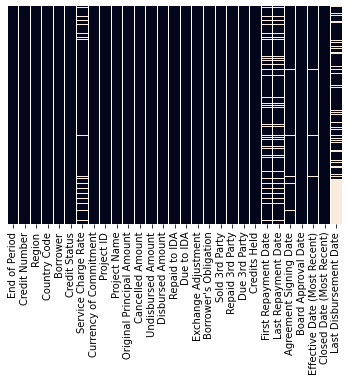

In [16]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=[])

Amongs columns with NaN value, "Last Disbursement Date" is the one with the most amount of missing values. It could be dropped without affecting the information of dataset since this cleaning will focus on extracting information for country, region categories.

In [17]:
df.drop("Last Disbursement Date", inplace=True, axis=1)

In [18]:
df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)

Last Repayment Date             126845
First Repayment Date            126845
Service Charge Rate              56786
Agreement Signing Date           13726
Effective Date (Most Recent)      8803
Borrower                           442
Closed Date (Most Recent)          350
Board Approval Date                179
Project Name                        43
Repaid 3rd Party                     2
Sold 3rd Party                       2
Due 3rd Party                        2
Due to IDA                           2
Repaid to IDA                        2
Disbursed Amount                     2
Cancelled Amount                     2
Project ID                           2
Borrower's Obligation                2
dtype: int64

The remaining amount of missing value is still high for the date information, these columns will be removed rather than removing the rows with missing value which can reduce the information of dataset significantly. We will also drop "Borrower" column since the analyzing will focus on country and region, so we don't really need that information.

In [19]:
df.drop(["Last Repayment Date", "First Repayment Date", "Agreement Signing Date", "Effective Date (Most Recent)",
        "Closed Date (Most Recent)", "Board Approval Date", "Borrower"], axis=1, inplace=True)

In [20]:
df.shape

(879690, 21)

The dataset now contains 879,690 entries with 21 attributes.

In [21]:
df.isnull().sum()[df.isnull().sum()!=0].sort_values(ascending=False)

Service Charge Rate      56786
Project Name                43
Due 3rd Party                2
Repaid 3rd Party             2
Sold 3rd Party               2
Borrower's Obligation        2
Due to IDA                   2
Repaid to IDA                2
Disbursed Amount             2
Cancelled Amount             2
Project ID                   2
dtype: int64

The major of missing values now is in "Interest Rate/ Service Charge Rate" column. Let's examine the value of it and decide to drop or not.

In [46]:
df["Service Charge Rate"].max()

4.95

We can see that the most common value is 0.

In [55]:
temp = df[["Service Charge Rate", "Region"]].copy()

In [56]:
temp.loc[:,"Service Charge Rate"].fillna(5, inplace = True)

In [57]:
temp.loc[:, "Service Charge Rate"].replace({0.0:0, 0.75:1, 2.0:2, 5:4}, inplace=True)

In [58]:
temp.loc[:,"Service Charge Rate"] = temp.loc[:, "Service Charge Rate"].apply(lambda x: 3 if x!=0 and x!=1 and x!=2 and x!= 4 else x)

In [64]:
a = temp.groupby(["Region"])["Service Charge Rate"].value_counts()
b = temp.groupby(["Region"])["Service Charge Rate"].count()
c = a*100/b

In [137]:
d = c.to_frame()
title = [i for i in d.index.get_level_values(0).value_counts().index]
e = d.unstack()
label = [0.0, 1.0, 2.0, 3.0, 4.0]
e for i in title

Service Charge Rate                       \
Service Charge Rate                          0.0        1.0       2.0   
Region                                                                  
AFRICA                                 10.264925  82.123513  0.828690   
AFRICA EAST                             0.365946  78.387687  0.990206   
AFRICA WEST                             0.843967  70.571687  3.195017   
EAST ASIA AND PACIFIC                  11.380856  74.704785  5.689290   
EUROPE AND CENTRAL ASIA                11.047066  61.245082  4.578546   
LATIN AMERICA AND CARIBBEAN             7.317035  82.519208  2.561118   
MIDDLE EAST AND NORTH AFRICA            8.988639  83.270525  1.616280   
OTHER                                  13.924051        NaN       NaN   
SOUTH ASIA                              6.393962  83.311929  4.311986   

                                                    
Service Charge Rate                 3.0        4.0  
Region                                              
AFRICA                         0.458682   6.324190  
AFRICA EAST                    1.474545  18.781617  
AFRICA WEST                    2.190294  23.199035  
EAST ASIA AND PACIFIC          0.755387   7.469682  
EUROPE AND CENTRAL ASIA       15.413873   7.715432  
LATIN AMERICA AND CARIBBEAN    2.517656   5.084983  
MIDDLE EAST AND NORTH AFRICA   0.128409   5.996148  
OTHER                               NaN  86.075949  
SOUTH ASIA                     1.534121   4.448001

In [133]:
f = e.loc["OTHER",:].unstack()
f[0.0]["Service Charge Rate"]

13.924050632911392

In [125]:
[f[i] for i in label]

[Service Charge Rate        0.0  1.0  2.0  3.0        4.0
 Service Charge Rate  13.924051  NaN  NaN  NaN  86.075949,
 Service Charge Rate        0.0  1.0  2.0  3.0        4.0
 Service Charge Rate  13.924051  NaN  NaN  NaN  86.075949,
 Service Charge Rate        0.0  1.0  2.0  3.0        4.0
 Service Charge Rate  13.924051  NaN  NaN  NaN  86.075949,
 Service Charge Rate        0.0  1.0  2.0  3.0        4.0
 Service Charge Rate  13.924051  NaN  NaN  NaN  86.075949,
 Service Charge Rate        0.0  1.0  2.0  3.0        4.0
 Service Charge Rate  13.924051  NaN  NaN  NaN  86.075949,
 Service Charge Rate        0.0  1.0  2.0  3.0        4.0
 Service Charge Rate  13.924051  NaN  NaN  NaN  86.075949,
 Service Charge Rate        0.0  1.0  2.0  3.0        4.0
 Service Charge Rate  13.924051  NaN  NaN  NaN  86.075949,
 Service Charge Rate        0.0  1.0  2.0  3.0        4.0
 Service Charge Rate  13.924051  NaN  NaN  NaN  86.075949,
 Service Charge Rate        0.0  1.0  2.0  3.0        4.0
 Servi

In [117]:
e

Service Charge Rate                       \
Service Charge Rate                          0.0        1.0       2.0   
Region                                                                  
AFRICA                                 10.264925  82.123513  0.828690   
AFRICA EAST                             0.365946  78.387687  0.990206   
AFRICA WEST                             0.843967  70.571687  3.195017   
EAST ASIA AND PACIFIC                  11.380856  74.704785  5.689290   
EUROPE AND CENTRAL ASIA                11.047066  61.245082  4.578546   
LATIN AMERICA AND CARIBBEAN             7.317035  82.519208  2.561118   
MIDDLE EAST AND NORTH AFRICA            8.988639  83.270525  1.616280   
OTHER                                  13.924051        NaN       NaN   
SOUTH ASIA                              6.393962  83.311929  4.311986   

                                                    
Service Charge Rate                 3.0        4.0  
Region                                              
AFRICA                         0.458682   6.324190  
AFRICA EAST                    1.474545  18.781617  
AFRICA WEST                    2.190294  23.199035  
EAST ASIA AND PACIFIC          0.755387   7.469682  
EUROPE AND CENTRAL ASIA       15.413873   7.715432  
LATIN AMERICA AND CARIBBEAN    2.517656   5.084983  
MIDDLE EAST AND NORTH AFRICA   0.128409   5.996148  
OTHER                               NaN  86.075949  
SOUTH ASIA                     1.534121   4.448001

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(10,10))

axes[0,0].set()
